In [1]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/39.5 MB 1.7 MB/s eta 0:00:24
   ---------------------------------------- 0.5/39.5 MB 3.3 MB/s eta 0:00:12
   - -------------------------------------- 1.0/39.5 MB 5.8 MB/s eta 0:00:07
   - -------------------------------------- 1.6/39.5 MB 7.0 MB/s eta 0:00:06
   -- ------------------------------------- 2.5/39.5 MB 8.8 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/39.5 MB 8.8 MB/s eta 0:00:05
   --- ------------------------------------ 3.9/39.5 MB 10.9 MB/s eta 0:00:04
   ----- ---------------------------------- 5.6/39.5 MB 12.7 MB/s eta 0:00:03
   ------ ---


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


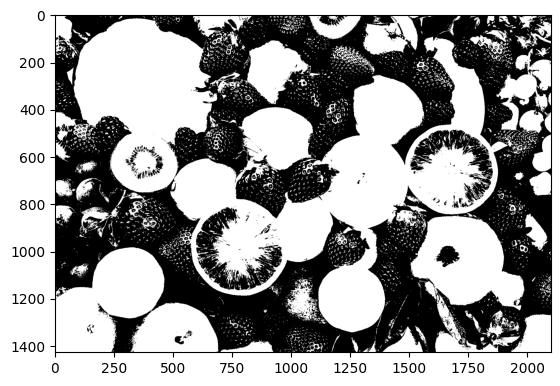

In [ ]:
#2.1: Phân vùng theo histogram
#2.1.1: Phương pháp Otsu

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters.thresholding import threshold_otsu

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

# performing Otsu’s thresholding
thres = threshold_otsu(a)

# pixels with intensity greater than threshold are kept
b = a > thres

b = Image.fromarray(b)

plt.imshow(b)
plt.show()



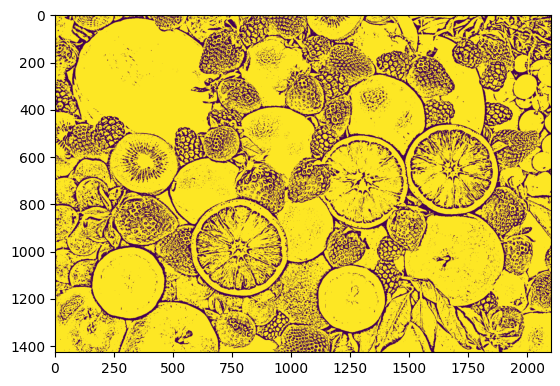

In [ ]:
#2.1.2: Phương pháp Adaptive Thresholding

from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pylab as plt
from skimage.filters import threshold_local

data = Image.open('fruit.jpg').convert('L')

a = np.asarray(data)

# performing local thresholding
b = threshold_local(a, 39, offset=10)

b = a > b

plt.imshow(b)
plt.show()


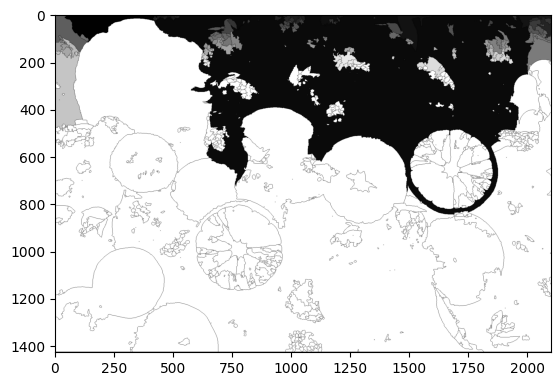

In [16]:
#2.2: Phân vùng theo region 
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = cv2.imread('fruit.jpg')
# converting image from color to grayscale
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
# thresholding the image to obtain cell pixels
thres, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# since Otsu’s method has over segmented the image
# erosion operation is performed
b2 = cv2.erode(b1, None, iterations = 2)
# distance transform is performed
dist_trans = cv2.distanceTransform(b2, 2, 3)
# thresholding the distance transform image to obtain 
# sure cells that are foreground
_, dist = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
# performing labeling
labelled, no = label(dist)
# labelled is converted to 32-bit integer
labelled = labelled.astype(np.int32)
# performing watershed
cv2.watershed(data, labelled)
b = Image.fromarray(labelled)

plt.imshow(b)
plt.show()


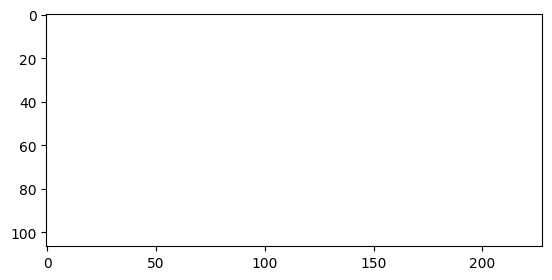

In [15]:
#2.3: Biến đổi đối tượng trong ảnh
#2.3.1: Sử dụng binary_dilation
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
b = nd.binary_dilation(data, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


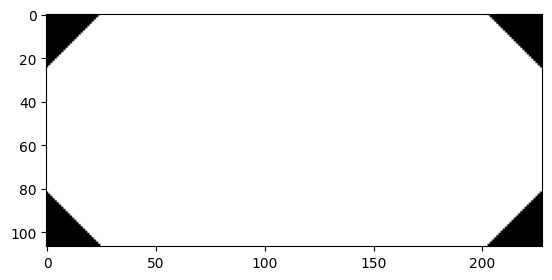

In [14]:
#2.3.2: Sử dụng binary_opening
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_opening(data, structure=s, iterations=25)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


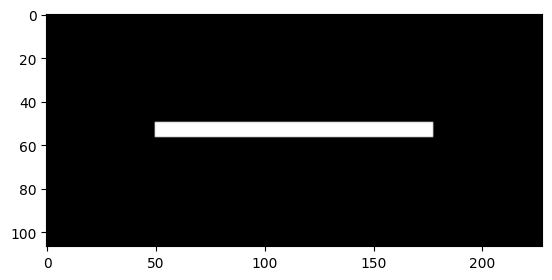

In [13]:
#2.3.3: Sử dụng binary_erosion
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_erosion(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


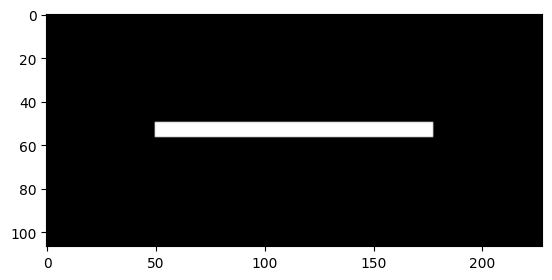

In [17]:
#2.3.4:Sử dụng binary_closing
import cv2
from PIL import Image
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
from scipy.ndimage import label
import matplotlib.pylab as plt
from skimage.filters import threshold_local

# opening the image and converting it to grayscale
data = Image.open('dil_img.gif').convert('L')
# defining the structuring element
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b = nd.binary_closing(data, structure=s, iterations=50)

c = Image.fromarray(b)
c.show()
plt.imshow(c)
plt.show()


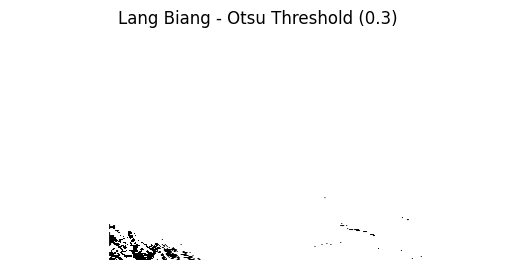

In [ ]:
#3:Bài tập
#Bài 1: Viết chương trình chọn LangBiang trong ảnh Đà Lạt từ thư mục exercise. Tịnh tiến vùng chọn sang phải 100px. Sử dụng phương pháp Otsu để phân vùng Lang Biang theo ngưỡng 0.3.Lưu vào máy với tên lang_biang.jpgvà hiển thị trên màn hình.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import os

path = 'exercise/dalat.jpg'
data = Image.open(path).convert('L')h
box = (20, 20, 420, 250) 
roi = data.crop(box)
translated_img = Image.new('L', (roi.width + 100, roi.height), color=255)
translated_img.paste(roi, (100, 0))
a = np.asarray(translated_img)
otsu_thresh = threshold_otsu(a)
binary_mask = a > (0.3 * otsu_thresh)
result = Image.fromarray((binary_mask * 255).astype(np.uint8))
result.save('lang_biang.jpg')

plt.imshow(result, cmap='gray')
plt.title("Lang Biang - Otsu Threshold (0.3)")
plt.axis('off')
plt.show()


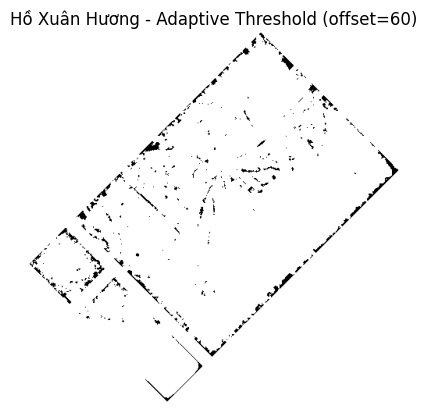

In [ ]:
#Bài 2: Viết chương trình chọn Hồ Xuân Hương trong ảnh Đà Lạt từ thư mục exercise. Xoay đối tượng vừa chọn 1 góc 45° và dùng phương pháp Adaptive Thresholding với ngưỡng 60 và lưu vào máy với tên là ho_xuan_huong.jpg.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_local

path = 'exercise/dalat.jpg'
data = Image.open(path).convert('L')
box = (430, 270, 850, 520)
roi = data.crop(box)
rotated = roi.rotate(45, expand=True, fillcolor=255)
a = np.asarray(rotated)
adaptive_thresh = threshold_local(a, block_size=39, offset=60)
binary_mask = a > adaptive_thresh
result = Image.fromarray((binary_mask * 255).astype(np.uint8))
result.save('ho_xuan_huong.jpg')

plt.imshow(result, cmap='gray')
plt.title("Hồ Xuân Hương - Adaptive Threshold (offset=60)")
plt.axis('off')
plt.show()


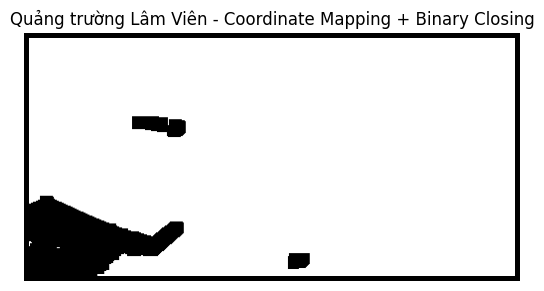

In [ ]:
#Bài 3: Viết chương trình chọn Quản trường Lâm Viên trong ảnh Đà Lạt từ thư mục exercise. Dùng phương pháp Coordinate Mapping và Binary Closing cho vùng vừa chọn. Lưu vào máy với tên là quan_truong_lam_vien.jpg.
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing, map_coordinates

data = Image.open('exercise/dalat.jpg').convert('L')
box = (860, 20, 1360, 270)
roi = data.crop(box)
a = np.asarray(roi)
binary = mapped > 100  
closed = binary_closing(binary, structure=np.ones((3,3)), iterations=5)
result = Image.fromarray((closed * 255).astype(np.uint8))
result.save('quan_truong_lam_vien.jpg')

plt.imshow(result, cmap='gray')
plt.title("Quảng trường Lâm Viên - Coordinate Mapping + Binary Closing")
plt.axis('off')
plt.show()


geometric_transformation
 ├── coordinate_mapping
 ├── Rotate
 ├── Scale
 └── Shift
segment
 ├── Adaptive_thresholding
 ├── Binary_dilation
 ├── Binary_erosion
 └── Otsu

Nhập chức năng cần xử lý (có thể nhập 1 hoặc 2 chức năng):
Ví dụ: coordinate_mapping
Ví dụ: rotate otsu
→ Coordinate Mapping: flip ảnh theo chiều ngang


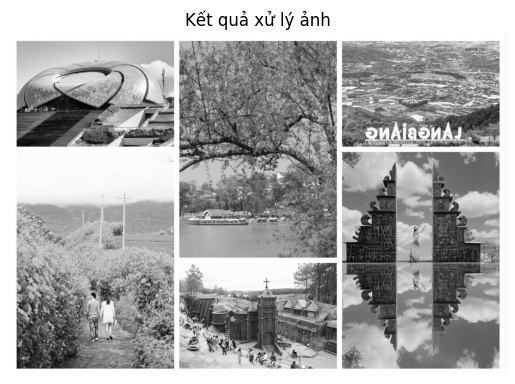

In [28]:
#Bài 4: Viết chương trình cho phép người dùng nhập chức năng muốn xử lý. (Có thể chọn 1 chức năng duy nhất hoặc kết hợp 2 chức năng của geometric_transformation và segment).
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation, binary_erosion, shift as nd_shift
from skimage.filters import threshold_local, threshold_otsu


def show_menu():
    print("geometric_transformation")
    print(" ├── coordinate_mapping")
    print(" ├── Rotate")
    print(" ├── Scale")
    print(" └── Shift")
    print("segment")
    print(" ├── Adaptive_thresholding")
    print(" ├── Binary_dilation")
    print(" ├── Binary_erosion")
    print(" └── Otsu")

def coordinate_mapping(img_np):
    print("→ Coordinate Mapping: flip ảnh theo chiều ngang")
    return np.fliplr(img_np)

def rotate(img_np):
    print("→ Rotate: xoay ảnh 45 độ")
    return np.array(Image.fromarray(img_np).rotate(45, expand=True, fillcolor=255))

def scale(img_np):
    print("→ Scale: thu nhỏ ảnh 0.5x")
    img_pil = Image.fromarray(img_np)
    w, h = img_pil.size
    return np.array(img_pil.resize((w//2, h//2)))

def shift(img_np):
    print("→ Shift: dịch ảnh 50px sang phải, 30px xuống dưới")
    return nd_shift(img_np, shift=(30, 50), cval=255)

def adaptive_thresholding(img_np):
    print("→ Adaptive Thresholding: offset = 10")
    thresh = threshold_local(img_np, block_size=39, offset=10)
    return (img_np > thresh) * 255

def binary_dilation_op(img_np):
    print("→ Binary Dilation: dãn nở")
    binary = img_np > 128
    return binary_dilation(binary, iterations=5) * 255

def binary_erosion_op(img_np):
    print("→ Binary Erosion: co lại")
    binary = img_np > 128
    return binary_erosion(binary, iterations=5) * 255

def otsu(img_np):
    print("→ Otsu Thresholding")
    thresh = threshold_otsu(img_np)
    return (img_np > thresh) * 255

geo_funcs = {
    "coordinate_mapping": coordinate_mapping,
    "rotate": rotate,
    "scale": scale,
    "shift": shift
}

segment_funcs = {
    "adaptive_thresholding": adaptive_thresholding,
    "binary_dilation": binary_dilation_op,
    "binary_erosion": binary_erosion_op,
    "otsu": otsu
}

def main():
    img = Image.open('exercise/dalat.jpg').convert('L')
    img_np = np.array(img)

    show_menu()
    print("\nNhập chức năng cần xử lý (có thể nhập 1 hoặc 2 chức năng):")
    print("Ví dụ: coordinate_mapping")
    print("Ví dụ: rotate otsu")

    choices = input("Nhập lựa chọn của bạn: ").lower().strip().split()
    
    if not choices or len(choices) > 2:
        print(" Vui lòng nhập tối đa 2 chức năng hợp lệ!")
        return

    result = img_np.copy()
    geo_applied = False
    seg_applied = False

    for func in choices:
        if func in geo_funcs and not geo_applied:
            result = geo_funcs[func](result)
            geo_applied = True
        elif func in segment_funcs and not seg_applied:
            result = segment_funcs[func](result)
            seg_applied = True
        else:
            print(f" Lựa chọn không hợp lệ hoặc bị trùng: {func}")
            return

    final = Image.fromarray(result.astype(np.uint8))
    plt.imshow(final, cmap='gray')
    plt.title("Kết quả xử lý ảnh")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()
